<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4210_202420_ADL/blob/main/Laboratorios/Laboratorio%203/MINE4210_ADL2024_Lab3_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Laboratorios/Laboratorio 3/MINE4210_ADL_2024_Lab3_S1.ipynb

![image](https://docs.google.com/uc?export=download&id=1NUy1Q-abpoV9XYK9qT9t8Mdhj3ZVlveO)


# **Laboratorio 3 - Sesión 1**
## **Creación de una Red Convolucional (CNN) y despliegue en Streamlit**

## **Tabla de Contenido**

[Contexto y objetivos.](#scrollTo=uGH410ZnYILV&line=13&uniqifier=1)<br>
[0. Importación de librerías.](#scrollTo=y1pFEFR1_-2V&line=1&uniqifier=1)<br>
[1. Entendimiento y preparación de los datos.](#scrollTo=9O1de2GRA1f2&line=1&uniqifier=1)<br>
[2. Modelamiento y evaluación.](#scrollTo=8ADZzDfHCUQ5&line=1&uniqifier=1)<br>
[3. Despliegue.](#scrollTo=LiL9RIh1EXe7&line=1&uniqifier=1)<br>




**Tutores**
- Fabián Camilo Castellanos.
- Nicolás Tibatá Castañeda.

## Contexto y objetivos

**Problema**
- En este caso exploraremos el dataset "Cat & Dog". Este dataset cuenta con 25000 imágenes. Las imágenes presentan diversas dimensiones, siendo 100x100 la más común. El objetivo es construir un clasificador a través del algoritmo de CNN que pueda distinguir entre cada uno de estos animales.

**Objetivos**
1. Construir un modelo CNN.
2. Desplegar el modelo en Streamlit.

**Datos**

Los datos los puedes consultar [aquí](https://www.kaggle.com/datasets/ashfakyeafi/cat-dog-images-for-classification/data).

## 0. Importación de librerías

In [ ]:
!pip install keras-tuner -q
!pip install kaggle -q
!pip install scikeras -q
# El '-q' hace referencia a 'quiet'. Por lo tanto el output de los paquetes no se muestra completo

     - 17.8 MB 21.3 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 25.7 MB/s eta 0:00:00
ERROR: Operation cancelled by user
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00
ERROR: Operation cancelled by user
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 50.5 MB/s eta 0:00:00


Para este ejercicio, utilizaremos las siguientes librerías.

In [ ]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mping
import seaborn as sns

from google.colab import files

from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

## 1. Entendimiento y preparación de los datos


**Debido a que el dataset es relativamente pesado ~500MB, los traeremos directo de Kaggle.**

Puedes ver [aquí](https://www.kaggle.com/discussions/general/74235) sobre cómo cargar datos directamente de kaggle.

In [ ]:
files.upload() # Cargamos el Kaggle.json (API)

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list #Correr este comando verifica que está bien montado el driver de kaggle

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           8055        171  1.0              
hanaksoy/health-and-sleep-statistics                             Health and sleep statistics                           1KB  2024-09-09 16:08:44           1642         28  1.0              
ironwolf404/laptop-price-dataset                                 Laptop Price - dataset                               25KB  2024-09-02 18:11:19      

In [ ]:
!kaggle datasets download ashfakyeafi/cat-dog-images-for-classification

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/cat-dog-images-for-classification
License(s): CC0-1.0
100% 543M/545M [00:07<00:00, 85.5MB/s]
100% 545M/545M [00:07<00:00, 78.3MB/s]


In [ ]:
ROOT_DIR = '/content'
DATASET_NAME = 'cat-dog-images-for-classification'

%cd {ROOT_DIR}
!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

Streaming output truncated to the last 5000 lines.
  inflating: /content/cat-dog-images-for-classification/cat_dog/dog.5499.jpg  
  inflating: /content/cat-dog-images-for-classification/cat_dog/dog.55.jpg  
  inflating: /content/cat-dog-images-for-classification/cat_dog/dog.550.jpg  
  inflating: /content/cat-dog-images-for-classification/cat_dog/dog.5500.jpg  
  inflating: /content/cat-dog-images-for-classification/cat_dog/dog.5501.jpg  
  inflating: /content/cat-dog-images-for-classification/cat_dog/dog.5502.jpg  
  inflating: /content/cat-dog-images-for-classification/cat_dog/dog.5503.jpg  
  inflating: /content/cat-dog-images-for-classification/cat_dog/dog.5504.jpg  
  inflating: /content/cat-dog-images-for-classification/cat_dog/dog.5505.jpg  
  inflating: /content/cat-dog-images-for-classification/cat_dog/dog.5506.jpg  
  inflating: /content/cat-dog-images-for-classification/cat_dog/dog.5507.jpg  
  inflating: /content/cat-dog-images-for-classification/cat_dog/dog.5508.jpg  
  in

In [ ]:
data = pd.read_csv(f'{ROOT_DIR}/{DATASET_NAME}/cat_dog.csv')
data.head()
#dog = 1 & cat = 0

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   25000 non-null  object
 1   labels  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


(352, 349, 3)


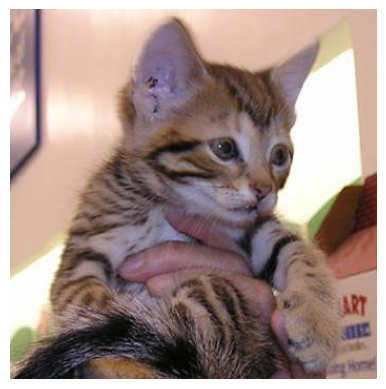

In [ ]:
img = imread("/content/cat-dog-images-for-classification/cat_dog/cat.12461.jpg")
plt.imshow(img)
print(img.shape)
plt.axis('off')
plt.show()

In [ ]:
data["labels"] = data["labels"].replace({1: "Dog", 0: "Cat"})
data.head()
# Se hace para el ImageDataGenerator

,image,labels
0,dog.11289.jpg,Dog
1,cat.10836.jpg,Cat
2,cat.7970.jpg,Cat
3,cat.2212.jpg,Cat
4,dog.2653.jpg,Dog


In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=19)
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

<Axes: xlabel='labels', ylabel='count'>

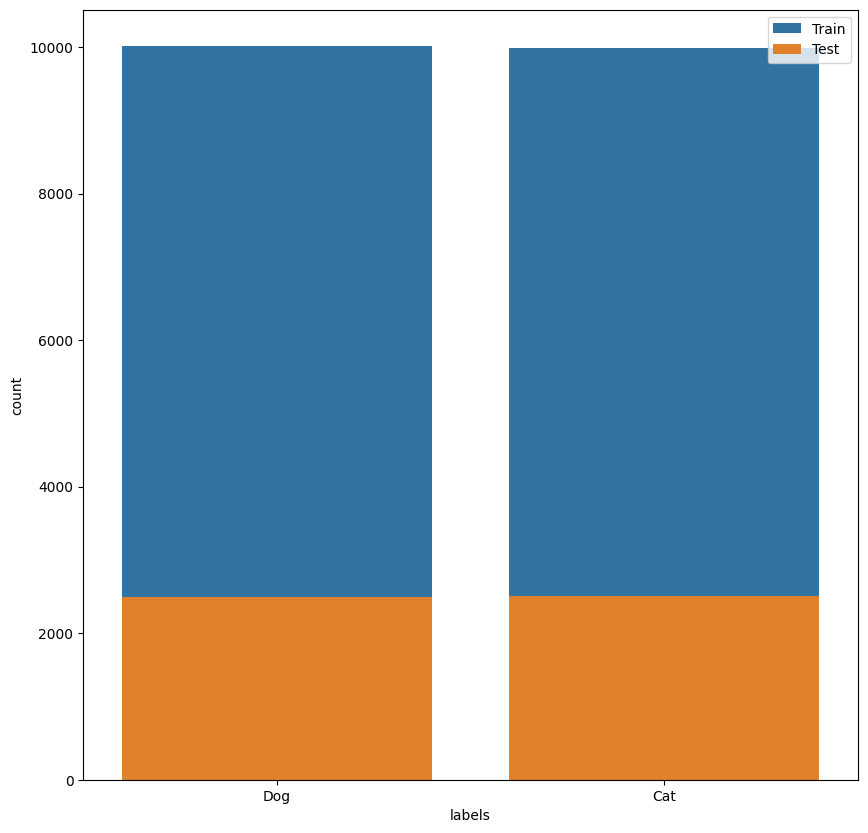

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(train_data, x="labels", label='Train')
sns.countplot(test_data, x="labels", label='Test')

## 2. Modelamiento y evaluación

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))) # Ajustar dimensiones en streamlit
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.1)
callbacks = [earlystop, learning_rate_reduction]

### 2.1. Data Augmentation

In [ ]:
total_train = train_data.shape[0]
total_test = test_data.shape[0]
batch_size = 15

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_data,
    "/content/cat-dog-images-for-classification/cat_dog", # Modify to your directory path
    x_col='image',
    y_col='labels',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    test_data,
    "/content/cat-dog-images-for-classification/cat_dog", # Modify to your directory path
    x_col='image',
    y_col='labels',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


**Veamos un ejemplo...**

Found 1 validated image filenames belonging to 1 classes.


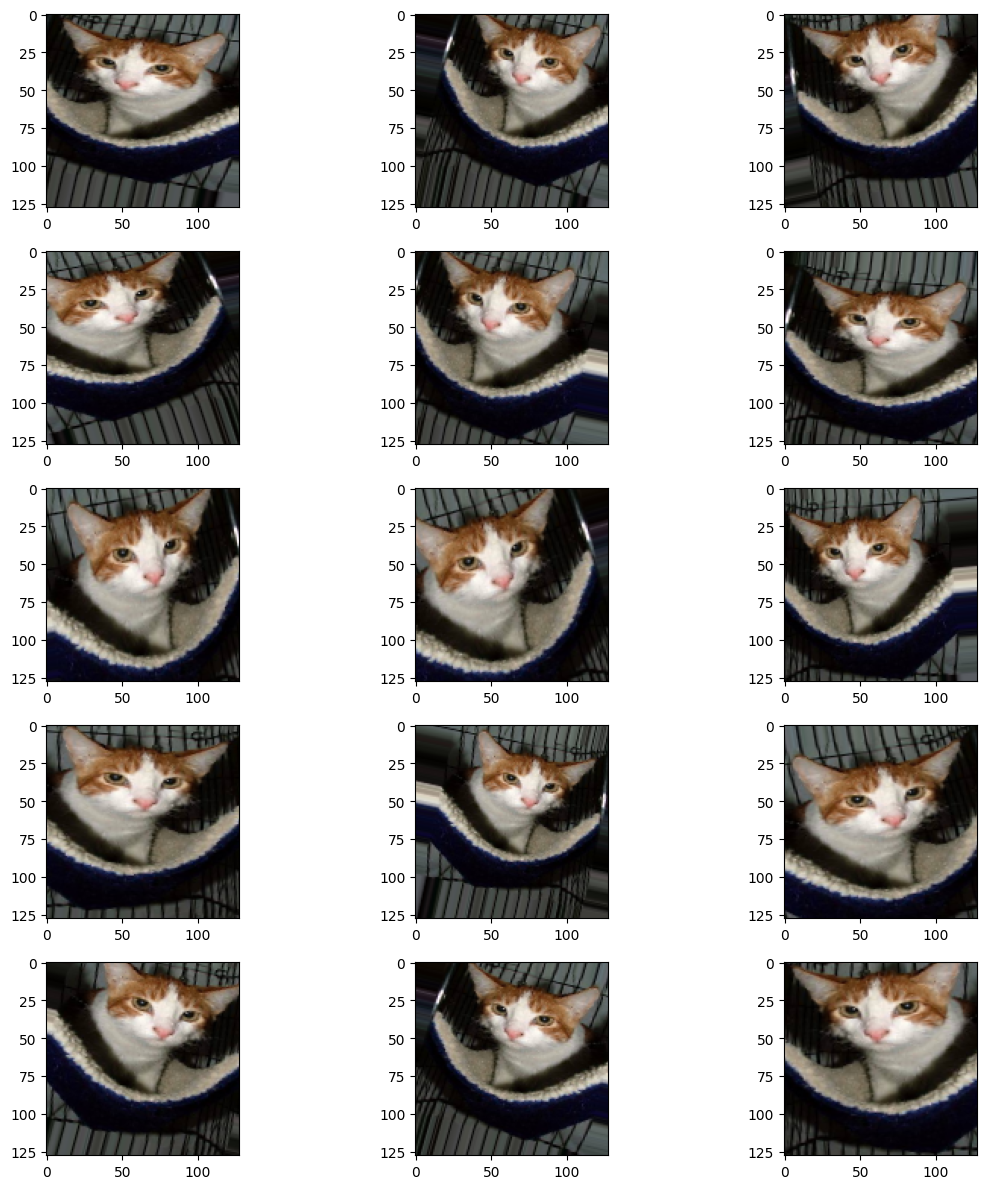

In [ ]:
example_df = train_data.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "/content/cat-dog-images-for-classification/cat_dog", # Modify to your directory path
    x_col='image',
    y_col='labels',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
print(len(train_data))
print(len(train_generator))

20000
1334


In [ ]:
epochs= 10 if FAST_RUN else 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_test//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 139s 96ms/step - accuracy: 0.6009 - loss: 0.9439 - val_accuracy: 0.6877 - val_loss: 0.6320 - learning_rate: 0.0010
Epoch 2/20
   1/1333 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.6667 - loss: 0.6598

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6667 - loss: 0.6598 - val_accuracy: 0.8000 - val_loss: 0.5817 - learning_rate: 0.0010
Epoch 3/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 121s 90ms/step - accuracy: 0.6975 - loss: 0.5834 - val_accuracy: 0.6761 - val_loss: 0.6240 - learning_rate: 0.0010
Epoch 4/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4667 - loss: 0.8565 - val_accuracy: 0.4000 - val_loss: 1.0852 - learning_rate: 0.0010
Epoch 5/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 137s 90ms/step - accuracy: 0.7457 - loss: 0.5223 - val_accuracy: 0.7349 - val_loss: 0.6597 - learning_rate: 0.0010
Epoch 6/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - accuracy: 0.6000 - loss: 0.6240 - val_accuracy: 1.0000 - val_loss: 0.0953 - learning_rate: 0.0010
Epoch 7/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 142s 107ms/step - accuracy: 0.7695 - loss: 0.4850 - val_accuracy: 0.8076 - val_loss: 0.4121 - learning_rate: 0.0010
Epoch 8/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step - accuracy: 0.8000 - 

In [ ]:
test_filenames = os.listdir("/content/cat-dog-images-for-classification/cat_dog")
test_df = pd.DataFrame({
    'image': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_data,
    "/content/cat-dog-images-for-classification/cat_dog",
    x_col='image',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 5000 validated image filenames.


In [ ]:
predict = model.predict(test_generator)

  6/334 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


334/334 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step


In [ ]:
label_encoder = LabelEncoder()
true_classes = label_encoder.fit_transform(test_data['labels'].values)

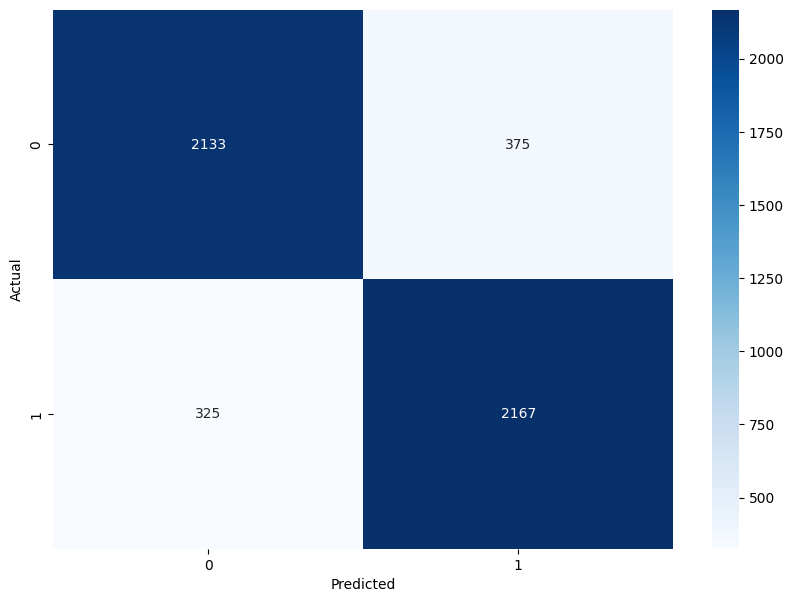

In [ ]:
predicted_classes = np.argmax(predict, axis=1)
label_encoder = LabelEncoder()
true_classes = label_encoder.fit_transform(test_data['labels'].values)

cm = confusion_matrix(true_classes, predicted_classes)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

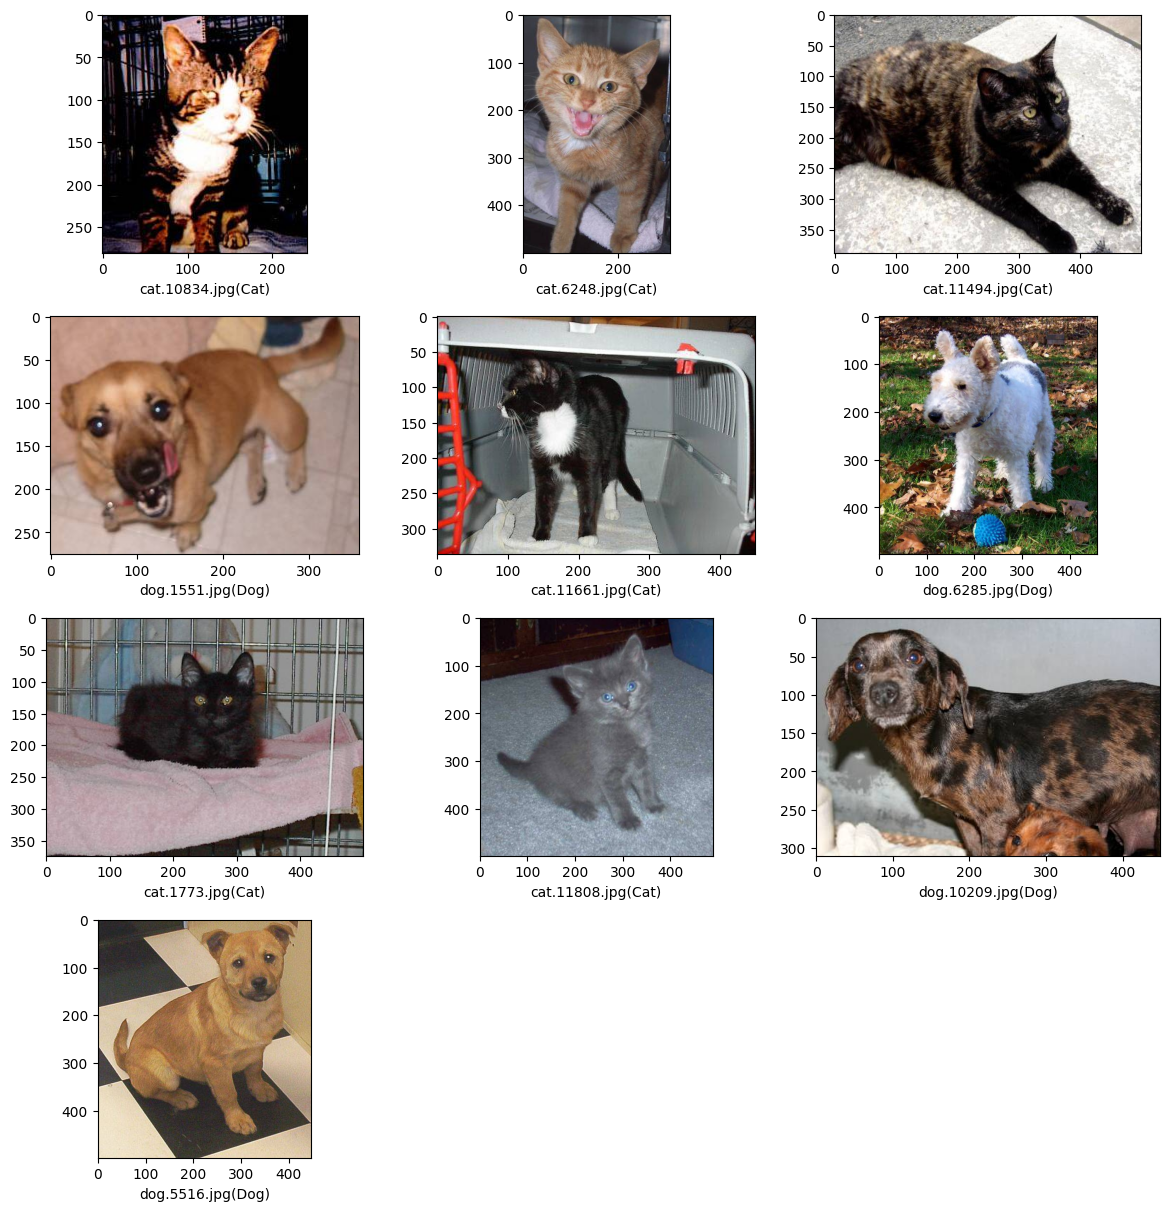

In [ ]:
sample_test = test_data.head(10)
sample_test.head()
plt.figure(figsize=(12, 51))
for index, row in sample_test.iterrows():
    filename = row['image']
    category = row['labels']
    img = np.array(mping.imread("/content/cat-dog-images-for-classification/cat_dog/" + filename))
    plt.subplot(17, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
# Guardar el modelo entrenado en un archivo
model.save('cnn_model.h5')

In [ ]:
from google.colab import files
# lo descargamos en local
files.download("/content/cnn_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3. Despliegue


Streamlit, un marco de desarrollo de código abierto en Python, se destaca por su capacidad para facilitar la creación de aplicaciones web interactivas y visualizaciones de datos de forma eficiente. Su singularidad radica en su enfoque hacia la simplicidad y facilidad de uso, permitiendo a los desarrolladores construir aplicaciones web con un mínimo de código.

En un entorno de desarrollo como Visual Studio Code (VS Code), tenemos el modelo exportado (exported_model), el código de la aplicación (app.py) y el ambiente virtual (venv) para el cual se tienen instaladas las librerias streamlit, tensorflow, etc.

Se hace el cargue del modelo mediante tf.keras.models.load_model:

```model = tf.keras.models.load_model("exported_model")```

![Streamlit Local](https://github.com/fcastellanosp/MINE-4210_202420_ADL/raw/main/Laboratorios/Laboratorio%203/streamlit_local.png)

Podemos ejecutar la aplicacion en el entorno local mediante el comando:

```streamlit run app.py```

### Streamlit Cloud

Para realizar el despligue es indispensable que el código esté versionado en github, como algunos archivos del modelo superan los 100MB que permite git es posible que requiera usar  Git LFS (Git Large File Storage) para poder subirlos al repositorio. También es importante que la estructura del repositorio sea similar a:

```
tu-repositorio/
├── tu_app.py
└── requirements.txt
└── model.h5
```

1. Accdeder a: https://streamlit.io/cloud, aqui se puede vincular la cuenta de github en donde se tiene el código de la aplicación

2. Dar clic en **New app**

3. Seleccione la opción: Paste GitHub URL

4. En GitHub URL, indique la url del archivo app.py dentro del repositorio de github, por ejemplo: https://github.com/nicolastibata/clasificador/blob/main/app.py

5. Streamlit generá automáticamente la url donde se expone la aplicación y realizará el despligue:

![Streamlit App](https://github.com/fcastellanosp/MINE-4210_202420_ADL/raw/main/Laboratorios/Laboratorio%203/streamlit_app.png)